<a href="https://colab.research.google.com/github/tecexbarto/Emotions_project/blob/main/Modelos_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importamos datos y librerías

In [ ]:
from google.colab import files
import zipfile

uploaded = files.upload()

# Nombre del archivo ZIP cargado
zip_file = "test.zip"
zip_file_2 = "train.zip"

#Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file, 'r') as extractZip:
    extractZip.extractall()

# Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_2, 'r') as extractZip:
    extractZip.extractall()

Saving test.zip to test.zip
Saving train.zip to train.zip


In [ ]:
#librerias para dividir datos
from sklearn.model_selection import train_test_split

#librerias para acceder a carpetas e importar archivos
from google.colab.patches import cv2_imshow
import glob
import cv2
from tqdm import tqdm
import os

#librerias para trabajar con datos
import numpy as np
import pandas as pd

In [ ]:
#extracción de datos para train


# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy","angry"]

# Procedemos a cargar la carpeta train que contiene varias subcarpetas, cada una de ellas es una emoción
print("Cargando dataset de imágenes:")

X_train, Y_train, X_val, Y_val = [], [], [], []

# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("train/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders): # Recorremos las subcarpetas
  print(file.split("\\")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")): # Recorremos las imágenes de cada carpeta
    image = cv2.imread(imagepath, 0) # El 0 hace que lea la imagen en ByN
    del imagepath
    Xaux.append(image)
    Yaux.append(label) # Guardamos también las etiquetas de las imágenes

  # Aquí, como las imágenes van agrupadas en carpetas, para cada carpeta,
  # que es una emoción, cogemos el 90% para entrenar y el 10% restante para la validación
  N_images = len(Xaux)
  data_split = round(N_images * 0.80)
  X_train += Xaux[:data_split]
  X_val += Xaux[data_split:]
  Y_train += Yaux[:data_split]
  Y_val += Yaux[data_split:]

# Convertir listas a arrays numpy
X_train = np.array(X_train)
X_val = np.array(X_val)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)

# Mostrar tanto el número de muestras como el número de etiquetas para el entrenamiento y la validación
print("[+] Número de muestras para el entrenamiento:", X_train.shape[0])
print("[+] Número de muestras para la validación:", X_val.shape[0])
print("[+] Número de etiquetas de entrenamiento:", Y_train.shape[0])
print("[+] Número de etiquetas de validación:", Y_val.shape[0])


Cargando dataset de imágenes:
train/sad


100%|██████████| 4830/4830 [00:00<00:00, 19013.95it/s]


train/disgust


100%|██████████| 436/436 [00:00<00:00, 18165.10it/s]


train/fear


100%|██████████| 4097/4097 [00:00<00:00, 19233.96it/s]


train/surprise


100%|██████████| 3171/3171 [00:00<00:00, 18104.86it/s]


train/neutral


100%|██████████| 4965/4965 [00:00<00:00, 19675.87it/s]


train/happy


100%|██████████| 7215/7215 [00:00<00:00, 18904.50it/s]


train/angry


100%|██████████| 3995/3995 [00:00<00:00, 19391.60it/s]

[+] Número de muestras para el entrenamiento: 22968
[+] Número de muestras para la validación: 5741
[+] Número de etiquetas de entrenamiento: 22968
[+] Número de etiquetas de validación: 5741


In [ ]:
#extracción de datos para test

# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy", "angry"]
# Comenzamos leyendo todas las subcarpetas que se encuentran en la carpeta "test" para ir cargando las imágenes con las que hacer luego predicciones
print("Cargando dataset de imágenes para hacer predicciones...")
Xtest, Ytest = [], []
# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("test/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders):
  print(file.split("/")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")):
    image = cv2.imread(imagepath, 0) # El 1 hace que lea la imagen con 3 canales
    Xaux.append(image)
    Yaux.append(label) # Guardamos las etiquetas de las emociones
  Xtest = Xtest + Xaux
  Ytest = Ytest + Yaux
  del Xaux, Yaux
X_test = np.array(Xtest)
Y_test = np.array(Ytest)
del Xtest, Ytest


Cargando dataset de imágenes para hacer predicciones...
sad


100%|██████████| 1247/1247 [00:00<00:00, 20433.56it/s]


disgust


100%|██████████| 111/111 [00:00<00:00, 15468.91it/s]


fear


100%|██████████| 1024/1024 [00:00<00:00, 19812.65it/s]


surprise


100%|██████████| 831/831 [00:00<00:00, 19650.27it/s]


neutral


100%|██████████| 1233/1233 [00:00<00:00, 19481.57it/s]


happy


100%|██████████| 1774/1774 [00:00<00:00, 21131.38it/s]


angry


100%|██████████| 958/958 [00:00<00:00, 19536.47it/s]


In [ ]:
# Importamos librerías
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import keras
import pandas as pd
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix

##Primera Red

In [ ]:
# CNN Architecture
modelo1 = keras.models.Sequential([
    Conv2D(16,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(7, activation="softmax", kernel_regularizer=regularizers.l2(0.01)),
])


# Model compile
#model = Model(inputs=input,outputs=output)
modelo1.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
modelo1.summary()


# Configure Model Checkpoint
save_modelo1 ='emotion_modelo1.h5'
checkpointer = ModelCheckpoint(save_modelo1, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0         
                                                        

In [ ]:
modelo1_fit = modelo1.fit(X_train,Y_train,batch_size=32,validation_data=(X_val, Y_val),epochs=50,callbacks=[callback_list])

Epoch 1/50
718/718 [==============================] - ETA: 0s - loss: 2.9623 - accuracy: 0.2619
Epoch 1: loss improved from inf to 2.96231, saving model to emotion_modelo1.h5
718/718 [==============================] - 21s 17ms/step - loss: 2.9623 - accuracy: 0.2619 - val_loss: 2.3776 - val_accuracy: 0.3116
Epoch 2/50
 17/718 [..............................] - ETA: 4s - loss: 2.4020 - accuracy: 0.3125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


715/718 [============================>.] - ETA: 0s - loss: 2.1243 - accuracy: 0.3662
Epoch 2: loss improved from 2.96231 to 2.12389, saving model to emotion_modelo1.h5
718/718 [==============================] - 5s 7ms/step - loss: 2.1239 - accuracy: 0.3664 - val_loss: 1.9305 - val_accuracy: 0.4010
Epoch 3/50
718/718 [==============================] - ETA: 0s - loss: 1.8095 - accuracy: 0.4158
Epoch 3: loss improved from 2.12389 to 1.80954, saving model to emotion_modelo1.h5
718/718 [==============================] - 9s 13ms/step - loss: 1.8095 - accuracy: 0.4158 - val_loss: 1.6990 - val_accuracy: 0.4430
Epoch 4/50
716/718 [============================>.] - ETA: 0s - loss: 1.6484 - accuracy: 0.4437
Epoch 4: loss improved from 1.80954 to 1.64861, saving model to emotion_modelo1.h5
718/718 [==============================] - 7s 10ms/step - loss: 1.6486 - accuracy: 0.4437 - val_loss: 1.6227 - val_accuracy: 0.4715
Epoch 5/50
711/718 [============================>.] - ETA: 0s - loss: 1.5495 - 

In [ ]:
ypred_modelo1 = modelo1.predict(X_test)

225/225 [==============================] - 1s 3ms/step


In [ ]:
y_pred_labels1 = np.argmax(ypred_modelo1, axis=1)
Y_test_labels1 = np.argmax(Y_test, axis=1)


Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 59.05 %
Accuracy del modelo: 56.77 %


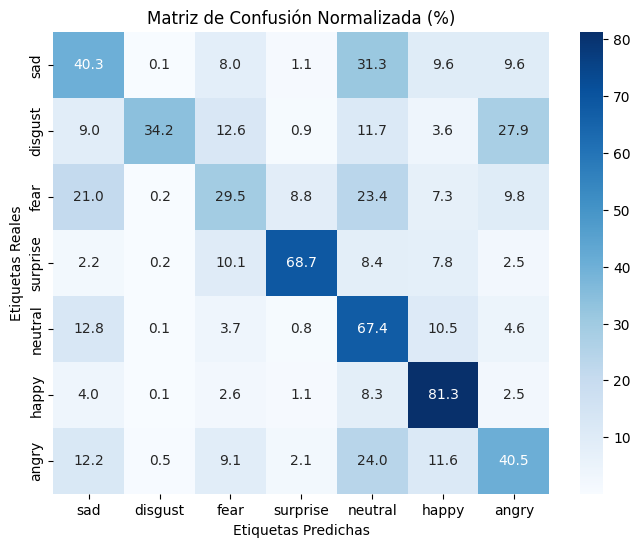

In [ ]:
precision = precision_score(Y_test_labels1, y_pred_labels1, average='macro') *100
accuracy = np.mean(y_pred_labels1 == Y_test_labels1) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels1, "Predicción Emoción": y_pred_labels1})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels1, y_pred_labels1)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()


##Segunda Red

In [ ]:
# CNN Architecture
modelo2 = keras.models.Sequential([
    Conv2D(16,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(256,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(128,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(64,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(32,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(16,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(16,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(32,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(64,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(128,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(256,(5,5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(16,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(7, activation="softmax", kernel_regularizer=regularizers.l2(0.01)),
])


# Model compile
#model = Model(inputs=input,outputs=output)
modelo2.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
modelo2.summary()


# Configure Model Checkpoint
save_modelo2='emotion_modelo2.h5'
checkpointer = ModelCheckpoint(save_modelo2, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 16)        160       
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 16)        0         
                                                                 
 activation_5 (Activation)   (None, 48, 48, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 dropout_7 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 activation_6 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)       

In [ ]:
modelo2_fit = modelo2.fit(X_train,Y_train,batch_size=32,validation_data=(X_val, Y_val),epochs=50,callbacks=[callback_list])

Epoch 1/50
718/718 [==============================] - ETA: 0s - loss: 2.6379 - accuracy: 0.2462
Epoch 1: loss improved from inf to 2.63794, saving model to emotion_modelo2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


718/718 [==============================] - 84s 99ms/step - loss: 2.6379 - accuracy: 0.2462 - val_loss: 2.0592 - val_accuracy: 0.2513
Epoch 2/50
718/718 [==============================] - ETA: 0s - loss: 1.9617 - accuracy: 0.2509
Epoch 2: loss improved from 2.63794 to 1.96175, saving model to emotion_modelo2.h5
718/718 [==============================] - 66s 92ms/step - loss: 1.9617 - accuracy: 0.2509 - val_loss: 1.8943 - val_accuracy: 0.2513
Epoch 3/50
718/718 [==============================] - ETA: 0s - loss: 1.8700 - accuracy: 0.2513
Epoch 3: loss improved from 1.96175 to 1.86998, saving model to emotion_modelo2.h5
718/718 [==============================] - 64s 89ms/step - loss: 1.8700 - accuracy: 0.2513 - val_loss: 1.8484 - val_accuracy: 0.2513
Epoch 4/50
718/718 [==============================] - ETA: 0s - loss: 1.8398 - accuracy: 0.2513
Epoch 4: loss improved from 1.86998 to 1.83980, saving model to emotion_modelo2.h5
718/718 [==============================] - 70s 97ms/step - loss:

In [ ]:
ypred_modelo2 = modelo2.predict(X_test)

225/225 [==============================] - 5s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 3.53 %
Accuracy del modelo: 24.71 %


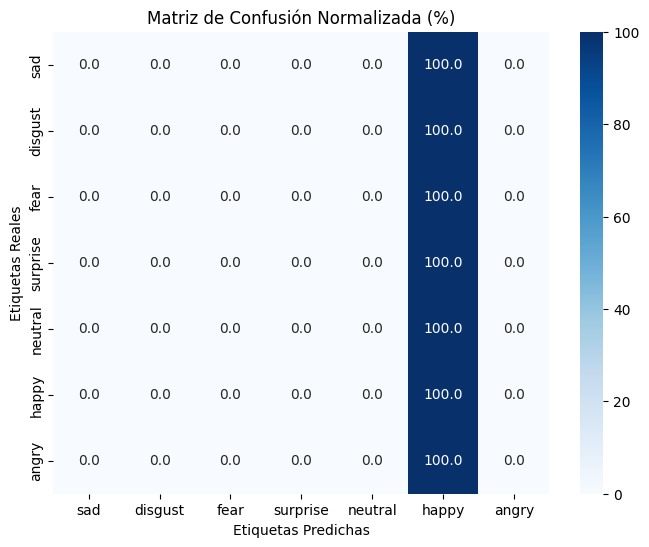

In [ ]:
y_pred_labels1 = np.argmax(ypred_modelo2, axis=1)
Y_test_labels1 = np.argmax(Y_test, axis=1)
precision = precision_score(Y_test_labels1, y_pred_labels1, average='macro') *100
accuracy = np.mean(y_pred_labels1 == Y_test_labels1) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels1, "Predicción Emoción": y_pred_labels1})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones+
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels1, y_pred_labels1)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

##Tercera Red

In [ ]:
# CNN Architecture
modelo3 = keras.models.Sequential([
    Conv2D(16,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7, activation="softmax"),
])


# Model compile
#model = Model(inputs=input,outputs=output)
modelo3.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
modelo3.summary()


# Configure Model Checkpoint
save_modelo3='emotion_modelo3.h5'
checkpointer = ModelCheckpoint(save_modelo3, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 dropout_27 (Dropout)        (None, 48, 48, 16)        0         
                                                                 
 activation_25 (Activation)  (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 dropout_28 (Dropout)        (None, 24, 24, 32)        0         
                                                      

In [ ]:
modelo3_fit = modelo3.fit(X_train,Y_train,batch_size=32,validation_data=(X_val, Y_val),epochs=50,callbacks=[callback_list])

Epoch 1/50
712/718 [============================>.] - ETA: 0s - loss: 2.0362 - accuracy: 0.2488
Epoch 1: loss improved from inf to 2.03437, saving model to emotion_modelo3.h5
718/718 [==============================] - 6s 6ms/step - loss: 2.0344 - accuracy: 0.2493 - val_loss: 1.7920 - val_accuracy: 0.3114
Epoch 2/50
 21/718 [..............................] - ETA: 3s - loss: 1.8310 - accuracy: 0.2976

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


711/718 [============================>.] - ETA: 0s - loss: 1.7439 - accuracy: 0.3386
Epoch 2: loss improved from 2.03437 to 1.74384, saving model to emotion_modelo3.h5
718/718 [==============================] - 5s 6ms/step - loss: 1.7438 - accuracy: 0.3389 - val_loss: 1.6619 - val_accuracy: 0.3848
Epoch 3/50
718/718 [==============================] - ETA: 0s - loss: 1.6426 - accuracy: 0.3893
Epoch 3: loss improved from 1.74384 to 1.64263, saving model to emotion_modelo3.h5
718/718 [==============================] - 4s 6ms/step - loss: 1.6426 - accuracy: 0.3893 - val_loss: 1.5568 - val_accuracy: 0.4423
Epoch 4/50
714/718 [============================>.] - ETA: 0s - loss: 1.5802 - accuracy: 0.4165
Epoch 4: loss improved from 1.64263 to 1.57962, saving model to emotion_modelo3.h5
718/718 [==============================] - 4s 6ms/step - loss: 1.5796 - accuracy: 0.4169 - val_loss: 1.5324 - val_accuracy: 0.4419
Epoch 5/50
710/718 [============================>.] - ETA: 0s - loss: 1.5210 - ac

In [ ]:
ypred_modelo3 = modelo3.predict(X_test)

225/225 [==============================] - 0s 2ms/step


In [ ]:
y_pred_labels3 = np.argmax(ypred_modelo3, axis=1)
Y_test_labels3 = np.argmax(Y_test, axis=1)

Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 59.41 %
Accuracy del modelo: 56.05 %


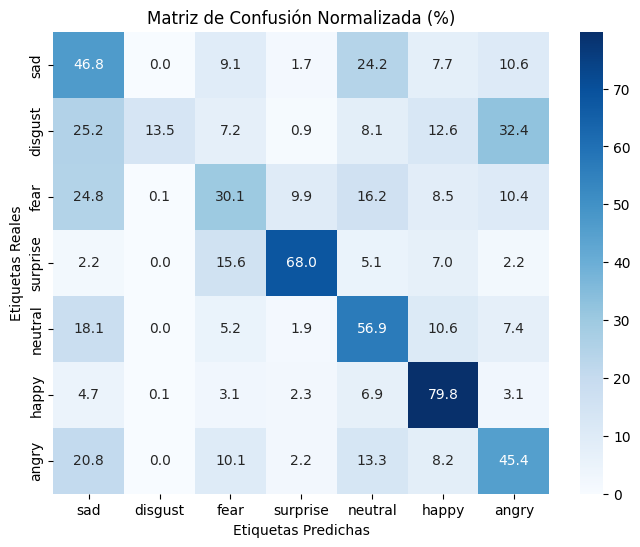

In [ ]:
precision = precision_score(Y_test_labels3, y_pred_labels3, average='macro') *100
accuracy = np.mean(y_pred_labels3 == Y_test_labels3) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels3, "Predicción Emoción": y_pred_labels3})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels3, y_pred_labels3)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

##Cuarta Red

In [ ]:
# CNN Architecture
modelo4 = keras.models.Sequential([
    Conv2D(8,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32, (5, 5), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(5, 5), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7, activation="softmax"),
])


# Model compile
#model = Model(inputs=input,outputs=output)
modelo4.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
modelo4.summary()


# Configure Model Checkpoint
save_modelo4='emotion_modelo4.h5'
checkpointer = ModelCheckpoint(save_modelo4, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 dropout_32 (Dropout)        (None, 48, 48, 8)         0         
                                                                 
 activation_29 (Activation)  (None, 48, 48, 8)         0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 24, 24, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 32)        6432      
                                                                 
 activation_30 (Activation)  (None, 24, 24, 32)        0         
                                                      

In [ ]:
modelo4_fit = modelo4.fit(X_train,Y_train,batch_size=32,validation_data=(X_val, Y_val),epochs=200,callbacks=[callback_list])

Epoch 1/200
718/718 [==============================] - ETA: 0s - loss: 1.9963 - accuracy: 0.2543
Epoch 1: loss improved from inf to 1.99629, saving model to emotion_modelo4.h5
718/718 [==============================] - 9s 8ms/step - loss: 1.9963 - accuracy: 0.2543 - val_loss: 1.7787 - val_accuracy: 0.3618
Epoch 2/200
 20/718 [..............................] - ETA: 3s - loss: 1.7945 - accuracy: 0.3422

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


718/718 [==============================] - ETA: 0s - loss: 1.7075 - accuracy: 0.3782
Epoch 2: loss improved from 1.99629 to 1.70747, saving model to emotion_modelo4.h5
718/718 [==============================] - 4s 6ms/step - loss: 1.7075 - accuracy: 0.3782 - val_loss: 1.6236 - val_accuracy: 0.4097
Epoch 3/200
715/718 [============================>.] - ETA: 0s - loss: 1.5783 - accuracy: 0.4342
Epoch 3: loss improved from 1.70747 to 1.57749, saving model to emotion_modelo4.h5
718/718 [==============================] - 4s 6ms/step - loss: 1.5775 - accuracy: 0.4344 - val_loss: 1.5271 - val_accuracy: 0.4579
Epoch 4/200
709/718 [============================>.] - ETA: 0s - loss: 1.5143 - accuracy: 0.4588
Epoch 4: loss improved from 1.57749 to 1.51412, saving model to emotion_modelo4.h5
718/718 [==============================] - 5s 7ms/step - loss: 1.5141 - accuracy: 0.4589 - val_loss: 1.4621 - val_accuracy: 0.4867
Epoch 5/200
714/718 [============================>.] - ETA: 0s - loss: 1.4628 -

In [ ]:
ypred_modelo4 = modelo4.predict(X_test)

225/225 [==============================] - 1s 3ms/step


In [ ]:
y_pred_labels4 = np.argmax(ypred_modelo4, axis=1)
Y_test_labels4 = np.argmax(Y_test, axis=1)

Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 56.18 %
Accuracy del modelo: 56.52 %


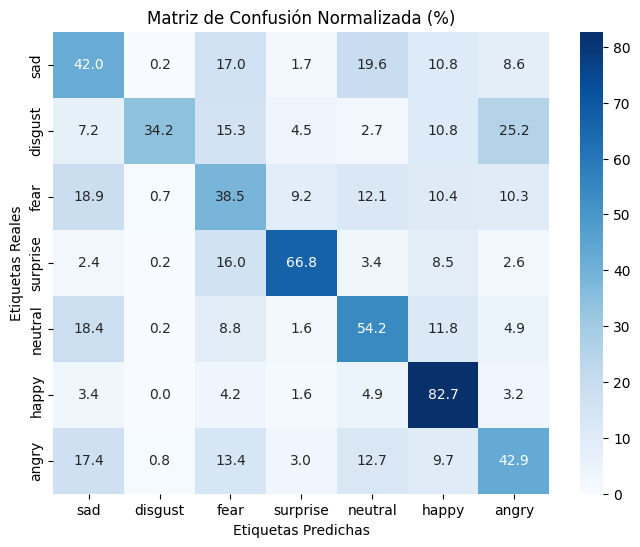

In [ ]:
precision = precision_score(Y_test_labels4, y_pred_labels4, average='macro') *100
accuracy = np.mean(y_pred_labels4 == Y_test_labels4) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels4, "Predicción Emoción": y_pred_labels4})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels4, y_pred_labels4)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

##Quinta Red

In [ ]:
modelo5 = keras.models.Sequential([
    keras.layers.Conv2D(filters =32, kernel_size=3, activation='relu', input_shape=[48, 48, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=7, activation='softmax'),
])

modelo5.summary()

modelo5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 4, 4, 128)        

In [ ]:
modelo5_fit = modelo5.fit(X_train, Y_train, validation_split = 0.2, epochs=50, batch_size=64)
print('CNN básica: ', modelo5.evaluate(X_test, Y_test))

Epoch 1/50
288/288 [==============================] - 5s 9ms/step - loss: 2.2760 - accuracy: 0.2881 - val_loss: 6.3075 - val_accuracy: 0.1713
Epoch 2/50
288/288 [==============================] - 2s 7ms/step - loss: 1.5102 - accuracy: 0.3791 - val_loss: 6.2184 - val_accuracy: 0.1972
Epoch 3/50
288/288 [==============================] - 2s 7ms/step - loss: 1.4494 - accuracy: 0.4071 - val_loss: 6.7134 - val_accuracy: 0.2114
Epoch 4/50
288/288 [==============================] - 2s 6ms/step - loss: 1.3888 - accuracy: 0.4372 - val_loss: 8.1368 - val_accuracy: 0.1467
Epoch 5/50
288/288 [==============================] - 2s 7ms/step - loss: 1.3363 - accuracy: 0.4634 - val_loss: 8.2055 - val_accuracy: 0.1800
Epoch 6/50
288/288 [==============================] - 2s 6ms/step - loss: 1.2859 - accuracy: 0.4862 - val_loss: 9.5036 - val_accuracy: 0.2368
Epoch 7/50
288/288 [==============================] - 2s 8ms/step - loss: 1.2348 - accuracy: 0.5093 - val_loss: 8.6676 - val_accuracy: 0.1996
Epoch 

In [ ]:
ypred_modelo5 = modelo5.predict(X_test)

225/225 [==============================] - 0s 2ms/step


In [ ]:
y_pred_labels5 = np.argmax(ypred_modelo5, axis=1)
Y_test_labels5 = np.argmax(Y_test, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 45.70 %
Accuracy del modelo: 49.64 %


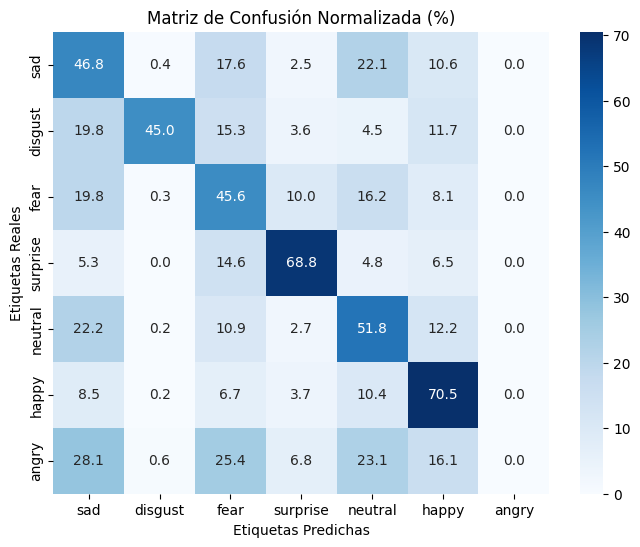

In [ ]:
precision = precision_score(Y_test_labels5, y_pred_labels5, average='macro') *100
accuracy = np.mean(y_pred_labels5 == Y_test_labels5) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels5, "Predicción Emoción": y_pred_labels5})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]
# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels5, y_pred_labels5)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

##Sexta Red

In [ ]:
modelo6 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="same", input_shape=[48, 48, 1]),
    keras.layers.Conv2D(64, 3, activation='relu',padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu',padding="same"),
    keras.layers.Conv2D(256, 3, activation='relu',padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu',padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu',padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=7, activation='softmax'),
])

modelo6.summary()

modelo6.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_38 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_40 (Conv2D)          (None, 24, 24, 256)       295168    
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                

Epoch 1/50
288/288 [==============================] - 16s 32ms/step - loss: 2.9883 - accuracy: 0.2476 - val_loss: 5.2895 - val_accuracy: 0.1770
Epoch 2/50
288/288 [==============================] - 8s 26ms/step - loss: 1.7080 - accuracy: 0.3919 - val_loss: 4.7955 - val_accuracy: 0.2640
Epoch 3/50
288/288 [==============================] - 8s 26ms/step - loss: 1.4257 - accuracy: 0.4827 - val_loss: 5.7026 - val_accuracy: 0.2505
Epoch 4/50
288/288 [==============================] - 8s 27ms/step - loss: 1.3019 - accuracy: 0.5246 - val_loss: 5.9982 - val_accuracy: 0.2575
Epoch 5/50
288/288 [==============================] - 8s 27ms/step - loss: 1.2285 - accuracy: 0.5586 - val_loss: 5.8763 - val_accuracy: 0.2597
Epoch 6/50
288/288 [==============================] - 8s 27ms/step - loss: 1.1757 - accuracy: 0.5880 - val_loss: 6.0483 - val_accuracy: 0.2553
Epoch 7/50
288/288 [==============================] - 8s 26ms/step - loss: 1.1256 - accuracy: 0.6123 - val_loss: 7.0443 - val_accuracy: 0.209

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 45.20 %
Accuracy del modelo: 53.04 %


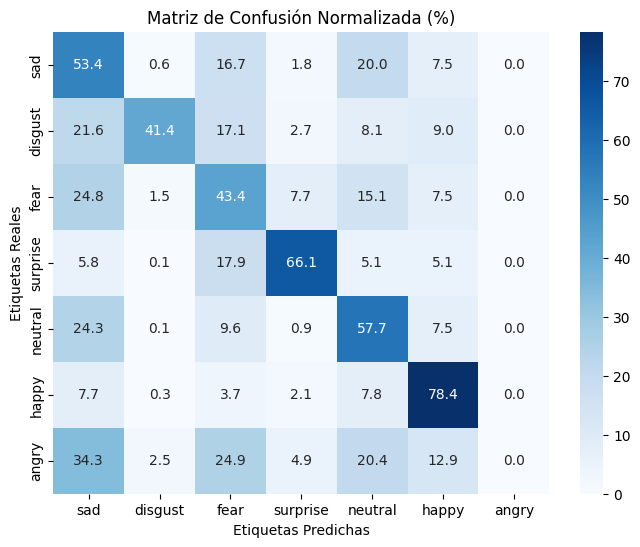

In [ ]:
modelo6_fit = modelo6.fit(X_train, Y_train, validation_split = 0.2, epochs=50, batch_size=64)
print('CNN básica: ', modelo6.evaluate(X_test, Y_test))

ypred_modelo6 = modelo6.predict(X_test)
y_pred_labels6 = np.argmax(ypred_modelo6, axis=1)
Y_test_labels6 = np.argmax(Y_test, axis=1)
precision = precision_score(Y_test_labels6, y_pred_labels6, average='macro') *100
accuracy = np.mean(y_pred_labels6 == Y_test_labels6) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels6, "Predicción Emoción": y_pred_labels6})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels6, y_pred_labels6)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

##Data Augmentation

In [ ]:
import imgaug.augmenters as iaa

In [ ]:
#extracción de datos para train


# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy","angry"]

# Procedemos a cargar la carpeta train que contiene varias subcarpetas, cada una de ellas es una emoción
print("Cargando dataset de imágenes:")

X_train_aug, Y_train_aug, X_val_aug, Y_val_aug = [], [], [], []

# Definir aumentador de datos (data augmentation)
seq = iaa.Sequential([
    iaa.Fliplr(1.0),  # imagen espejo
])

# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("train/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders): # Recorremos las subcarpetas
  print(file.split("\\")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")): # Recorremos las imágenes de cada carpeta
    image = cv2.imread(imagepath, 0) # El 0 hace que lea la imagen en ByN
    del imagepath
    Xaux.append(image)
    Yaux.append(label) # Guardamos también las etiquetas de las imágenes
    # Si la carpeta actual es "disgust", aplicamos data augmentation adicional
    if "disgust" in file.split("/")[-1]:
        for _ in range(2):
            augmented_img = seq(images=image)
            Xaux.append(augmented_img)
            Yaux.append(label) # Guardamos también las etiquetas de las imágenes
    if "fear" in file.split("/")[-1]:
        for _ in range(1):
          augmented_img = seq(images=image)
          Xaux.append(augmented_img)
          Yaux.append(label) # Guardamos también las etiquetas de las imágenes
    if "angry"in file.split("/")[-1]:
        for _ in range(1):
          augmented_img = seq(images=image)
          Xaux.append(augmented_img)
          Yaux.append(label)
    if "sad"in file.split("/")[-1]:
        for _ in range(1):
          augmented_img = seq(images=image)
          Xaux.append(augmented_img)
          Yaux.append(label)
    if "happy"in file.split("/")[-1]:
        for _ in range(1):
          augmented_img = seq(images=image)
          Xaux.append(augmented_img)
          Yaux.append(label)
    if "neutral"in file.split("/")[-1]:
        for _ in range(1):
          augmented_img = seq(images=image)
          Xaux.append(augmented_img)
          Yaux.append(label)
    if "surprise"in file.split("/")[-1]:
        for _ in range(1):
          augmented_img = seq(images=image)
          Xaux.append(augmented_img)
          Yaux.append(label)

  # Aquí, como las imágenes van agrupadas en carpetas, para cada carpeta,
  # que es una emoción, cogemos el 90% para entrenar y el 10% restante para la validación
  N_images = len(Xaux)
  data_split = round(N_images * 0.80)
  X_train_aug += Xaux[:data_split]
  X_val_aug += Xaux[data_split:]
  Y_train_aug += Yaux[:data_split]
  Y_val_aug += Yaux[data_split:]

# Convertir listas a arrays numpy
X_train_aug = np.array(X_train_aug)
X_val_aug = np.array(X_val_aug)
Y_train_aug = np.array(Y_train_aug)
Y_val_aug = np.array(Y_val_aug)

# Mostrar tanto el número de muestras como el número de etiquetas para el entrenamiento y la validación
print("[+] Número de muestras para el entrenamiento:", X_train.shape[0])
print("[+] Número de muestras para la validación:", X_val.shape[0])
print("[+] Número de etiquetas de entrenamiento:", Y_train.shape[0])
print("[+] Número de etiquetas de validación:", Y_val.shape[0])

Cargando dataset de imágenes:
train/sad


100%|██████████| 4830/4830 [00:01<00:00, 4025.00it/s]


train/disgust


100%|██████████| 436/436 [00:00<00:00, 2634.81it/s]


train/fear


100%|██████████| 4097/4097 [00:01<00:00, 4090.84it/s]


train/surprise


100%|██████████| 3171/3171 [00:00<00:00, 4109.96it/s]


train/neutral


100%|██████████| 4965/4965 [00:01<00:00, 4136.98it/s]


train/happy


100%|██████████| 7215/7215 [00:02<00:00, 2843.76it/s]


train/angry


100%|██████████| 3995/3995 [00:00<00:00, 4074.99it/s]


[+] Número de muestras para el entrenamiento: 22968
[+] Número de muestras para la validación: 5741
[+] Número de etiquetas de entrenamiento: 22968
[+] Número de etiquetas de validación: 5741


In [ ]:
#extracción de datos para test

# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy", "angry"]
# Comenzamos leyendo todas las subcarpetas que se encuentran en la carpeta "test" para ir cargando las imágenes con las que hacer luego predicciones
print("Cargando dataset de imágenes para hacer predicciones...")
Xtest, Ytest = [], []
# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("test/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders):
  print(file.split("/")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")):
    image = cv2.imread(imagepath, 0) # El 1 hace que lea la imagen con 3 canales
    Xaux.append(image)
    Yaux.append(label) # Guardamos las etiquetas de las emociones
  Xtest = Xtest + Xaux
  Ytest = Ytest + Yaux
  del Xaux, Yaux
X_test_aug = np.array(Xtest)
Y_test_aug = np.array(Ytest)
del Xtest, Ytest

Cargando dataset de imágenes para hacer predicciones...
sad


100%|██████████| 1247/1247 [00:00<00:00, 20810.81it/s]


disgust


100%|██████████| 111/111 [00:00<00:00, 16390.92it/s]


fear


100%|██████████| 1024/1024 [00:00<00:00, 22055.90it/s]


surprise


100%|██████████| 831/831 [00:00<00:00, 21511.38it/s]


neutral


100%|██████████| 1233/1233 [00:00<00:00, 20922.23it/s]


happy


100%|██████████| 1774/1774 [00:00<00:00, 21737.61it/s]


angry


100%|██████████| 958/958 [00:00<00:00, 22182.65it/s]


In [ ]:
# Import dependencies
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import keras
import pandas as pd
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
# CNN Architecture
model_aug = keras.models.Sequential([
    Conv2D(4,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(16,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Activation('relu'),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(7, activation="softmax"),
])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


model_aug.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model_aug.summary()



# Configure Model Checkpoint
save_model_aug='modelo_data_aug.h5'
checkpointer = ModelCheckpoint(save_model_aug, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer, early_stopping]

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 48, 48, 4)         40        
                                                                 
 dropout_46 (Dropout)        (None, 48, 48, 4)         0         
                                                                 
 activation_40 (Activation)  (None, 48, 48, 4)         0         
                                                                 
 conv2d_50 (Conv2D)          (None, 48, 48, 16)        592       
                                                                 
 activation_41 (Activation)  (None, 48, 48, 16)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 activation_42 (Activation)  (None, 48, 48, 32)       

In [ ]:
model_aug_fit = model_aug.fit(X_train,Y_train,batch_size=128,validation_data=(X_val, Y_val),epochs=50,callbacks=[callback_list])

Epoch 1/50
180/180 [==============================] - ETA: 0s - loss: 2.2708 - accuracy: 0.2383
Epoch 1: loss improved from inf to 2.27077, saving model to modelo_data_aug.h5
180/180 [==============================] - 7s 25ms/step - loss: 2.2708 - accuracy: 0.2383 - val_loss: 1.9606 - val_accuracy: 0.2811
Epoch 2/50
178/180 [============================>.] - ETA: 0s - loss: 1.8703 - accuracy: 0.3204
Epoch 2: loss improved from 2.27077 to 1.86937, saving model to modelo_data_aug.h5
180/180 [==============================] - 4s 24ms/step - loss: 1.8694 - accuracy: 0.3209 - val_loss: 1.7684 - val_accuracy: 0.3769
Epoch 3/50
178/180 [============================>.] - ETA: 0s - loss: 1.7258 - accuracy: 0.3880
Epoch 3: loss improved from 1.86937 to 1.72553, saving model to modelo_data_aug.h5
180/180 [==============================] - 4s 23ms/step - loss: 1.7255 - accuracy: 0.3881 - val_loss: 1.6534 - val_accuracy: 0.4231
Epoch 4/50
178/180 [============================>.] - ETA: 0s - loss: 1

In [ ]:
from google.colab import files
files.download('/Mejor_modelo.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
modelo_h5 = load_model('/Mejor_modelo.h5')

In [ ]:
ypred_aug = modelo_h5.predict(X_test)
ypred_labels_aug = np.argmax(ypred_aug, axis=1)
Ytest_labels_aug = np.argmax(Y_test, axis=1)


225/225 [==============================] - 1s 3ms/step


Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 58.05 %
Accuracy del modelo: 60.34 %


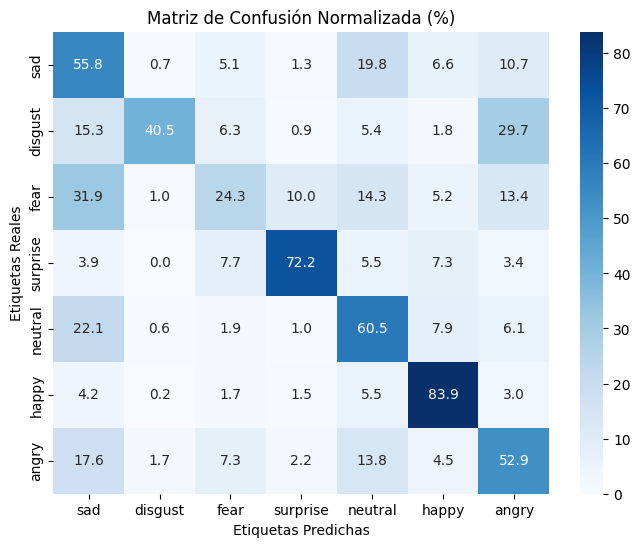

In [ ]:
precision = precision_score(Ytest_labels_aug, ypred_labels_aug, average='macro') *100
accuracy = np.mean(ypred_labels_aug == Ytest_labels_aug) * 100


resultados = pd.DataFrame({"Emoción": Ytest_labels_aug, "Predicción Emoción": ypred_labels_aug})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Ytest_labels_aug, ypred_labels_aug)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

##Segunda Red con Data Augmentation

In [ ]:
# CNN Architecture
model = keras.models.Sequential([
    Conv2D(8,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=[48, 48, 1]),
    Dropout(0.1),
    Activation('relu'),
    Conv2D(16,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Activation('relu'),
    Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(7, activation="softmax"),
])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()



# Configure Model Checkpoint
file_save='modelo_4.h5'
checkpointer = ModelCheckpoint(file_save, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer, early_stopping]


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 dropout_61 (Dropout)        (None, 48, 48, 8)         0         
                                                                 
 activation_58 (Activation)  (None, 48, 48, 8)         0         
                                                                 
 conv2d_68 (Conv2D)          (None, 48, 48, 16)        1168      
                                                                 
 activation_59 (Activation)  (None, 48, 48, 16)        0         
                                                                 
 conv2d_69 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 activation_60 (Activation)  (None, 48, 48, 32)      

In [ ]:
save = model.fit(X_train,Y_train,batch_size=64,validation_data=(X_val, Y_val),epochs=50,callbacks=[callback_list])

Epoch 1/50
358/359 [============================>.] - ETA: 0s - loss: 2.2840 - accuracy: 0.2474
Epoch 1: loss improved from inf to 2.28296, saving model to modelo_4.h5
359/359 [==============================] - 11s 19ms/step - loss: 2.2830 - accuracy: 0.2477 - val_loss: 1.9374 - val_accuracy: 0.3062
Epoch 2/50
356/359 [============================>.] - ETA: 0s - loss: 1.8340 - accuracy: 0.3488
Epoch 2: loss improved from 2.28296 to 1.83299, saving model to modelo_4.h5
359/359 [==============================] - 6s 17ms/step - loss: 1.8330 - accuracy: 0.3492 - val_loss: 1.7397 - val_accuracy: 0.3856
Epoch 3/50
357/359 [============================>.] - ETA: 0s - loss: 1.6800 - accuracy: 0.4145
Epoch 3: loss improved from 1.83299 to 1.68042, saving model to modelo_4.h5
359/359 [==============================] - 5s 15ms/step - loss: 1.6804 - accuracy: 0.4146 - val_loss: 1.6393 - val_accuracy: 0.4454
Epoch 4/50
357/359 [============================>.] - ETA: 0s - loss: 1.5787 - accuracy: 0.

In [ ]:
from google.colab import files
files.download('/Mejor_modelo_2.h5')
modelo_2h5 = load_model('/Mejor_modelo_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model
y_pred = modelo_2h5.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

225/225 [==============================] - 1s 4ms/step


Métricas de rendimiento del modelo elegido anteriormente:
Precision del modelo: 60.01 %
Accuracy del modelo: 58.22 %


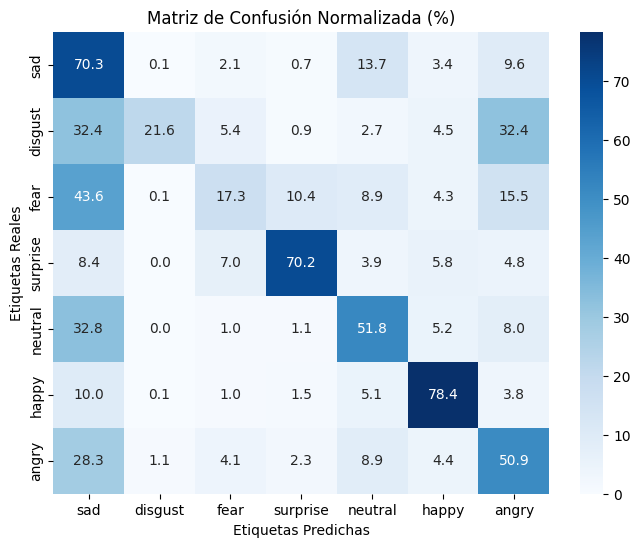

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(Y_test_labels, y_pred_labels, average='macro') *100
accuracy = np.mean(y_pred_labels == Y_test_labels) * 100


resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": y_pred_labels})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("Precision del modelo: {:.2f} %".format(precision))
print("Accuracy del modelo: {:.2f} %".format(accuracy))

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, y_pred_labels)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()